Importing all the necessary modules for this task.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, make_scorer

Loading the CSV with pandas to get a general overview of the data and checking for Null values.

In [24]:
df = pd.read_csv('/content/updated_pollution_dataset.csv')

print(df.isnull().sum())
print(df.shape)
df.head(15)

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64
(5000, 10)


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,Moderate
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor


Since there were no Null values, the next step is to encode the categorical target column for easier handling of the data by the model.

In [25]:
df_encoded = pd.get_dummies(df, columns=['Air Quality'], drop_first=False)

print(df_encoded.shape)
df_encoded.head(15)

(5000, 13)


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality_Good,Air Quality_Hazardous,Air Quality_Moderate,Air Quality_Poor
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,False,False,True,False
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,False,False,True,False
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,False,False,True,False
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,True,False,False,False
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,True,False,False,False
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,False,True,False,False
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,False,False,False,True
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,False,False,True,False
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,False,False,False,True
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,False,False,False,True


Checking the correlation matrix of the features.

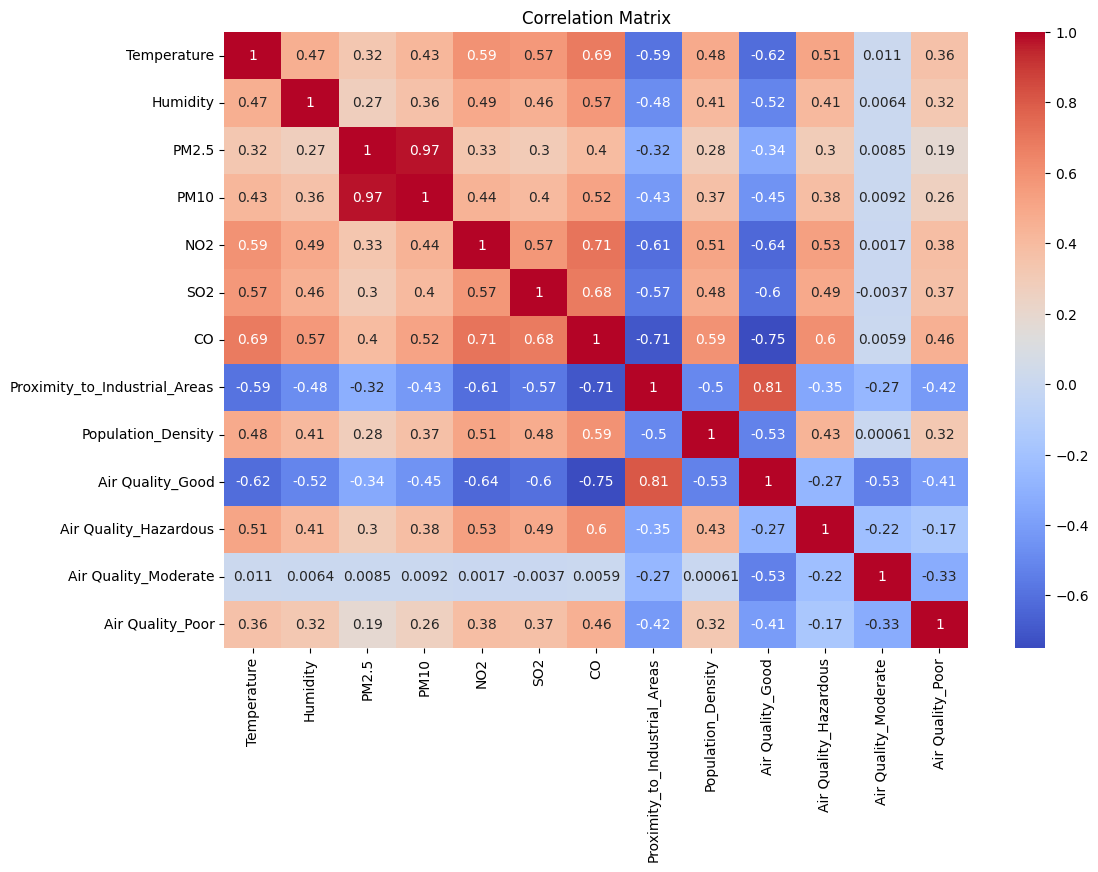

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Generating a synthetic dataset based off of the original dataset to be used for retraining the model later.

In [27]:
X_real = df.drop(columns=["Air Quality", "PM2.5"])
y_real = df["Air Quality"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_real)

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, covariance_type="full", random_state=42)
gmm.fit(X_scaled)

synthetic_samples = gmm.sample(n_samples=len(X_real))[0]  # Generate same number as original

X_synthetic = scaler.inverse_transform(synthetic_samples)

# Create synthetic DataFrame
synthetic_data = pd.DataFrame(X_synthetic, columns=X_real.columns)

# Assign random air quality labels based on real distribution
synthetic_data["Air Quality"] = np.random.choice(
    y_real.unique(), size=len(X_synthetic), p=y_real.value_counts(normalize=True)
)

synthetic_data.to_csv("synthetic_retrain_data.csv", index=False)

print("Fully synthetic retraining data saved as synthetic_retrain_data.csv")

Fully synthetic retraining data saved as synthetic_retrain_data.csv


The data is prepared and split in order to be used for training. The model used is Random Forest and it uses grid search to find the optimal hyperparameters. After training is complete, the model is saved as a .pkl file to be used later.

In [28]:
def prepare_data(df, target_columns):
    X = df.drop(columns=target_columns + ['PM2.5'])
    y = df[target_columns]
    y_rf = np.argmax(y.values, axis=1)  # Convert one-hot encoding to class labels
    return X, y_rf

def split_data(X, y_rf, test_size=0.2, random_state=42):
    return train_test_split(X, y_rf, test_size=test_size, random_state=random_state)

def train_random_forest(X_train, y_train):
    rf = RandomForestClassifier()

    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }

    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_log_loss', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_, grid_search.best_params_

def save_model(model, filename="best_rf_model.pkl"):
    joblib.dump(model, filename)
    print(f"Model saved as {filename}")


target_columns = ['Air Quality_Good', 'Air Quality_Moderate', 'Air Quality_Poor', 'Air Quality_Hazardous']
X, y_rf = prepare_data(df_encoded, target_columns)

X_train, X_test, y_train_rf, y_test_rf = split_data(X, y_rf)

best_model, best_params = train_random_forest(X_train, y_train_rf)
print(f"Best Parameters: {best_params}")

save_model(best_model)

Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Model saved as best_rf_model.pkl


The model's performance is evaluated according to the following metrics:
- Accuracy
- F1 Score (Precision and Recall)
- Loss

A confusion matrix has also been generated in graph format for easy visualization of the F1 Score.

Accuracy: 0.9560
Log Loss: 0.1403
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
    Moderate       0.96      0.97      0.97       294
        Poor       0.87      0.90      0.88       186
   Hazardous       0.92      0.86      0.89       111

    accuracy                           0.96      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.96      0.96      0.96      1000



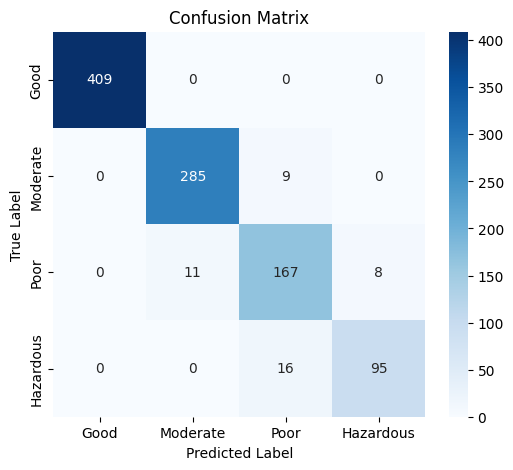

In [29]:
def evaluate_model(model, X_test, y_test, class_labels):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)

    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(f'Log Loss: {log_loss(y_test, y_pred_prob):.4f}')
    print(classification_report(y_test, y_pred, target_names=class_labels))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    return y_test, y_pred

class_labels = ["Good", "Moderate", "Poor", "Hazardous"]
y_test, y_pred = evaluate_model(best_model, X_test, y_test_rf, class_labels)

A scatter plot to better visualize the difference between the actual values and predicted values.

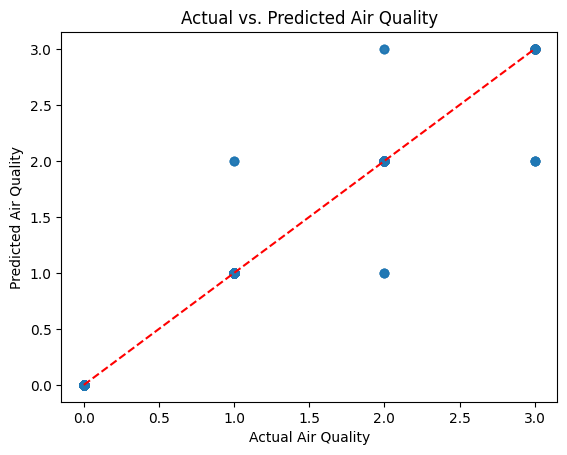

In [30]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Air Quality")
plt.ylabel("Predicted Air Quality")
plt.title("Actual vs. Predicted Air Quality")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Ideal line
plt.show()

A Partial Dependence Plot and SHAP plot to show how each feature affects the target (Air Quality).

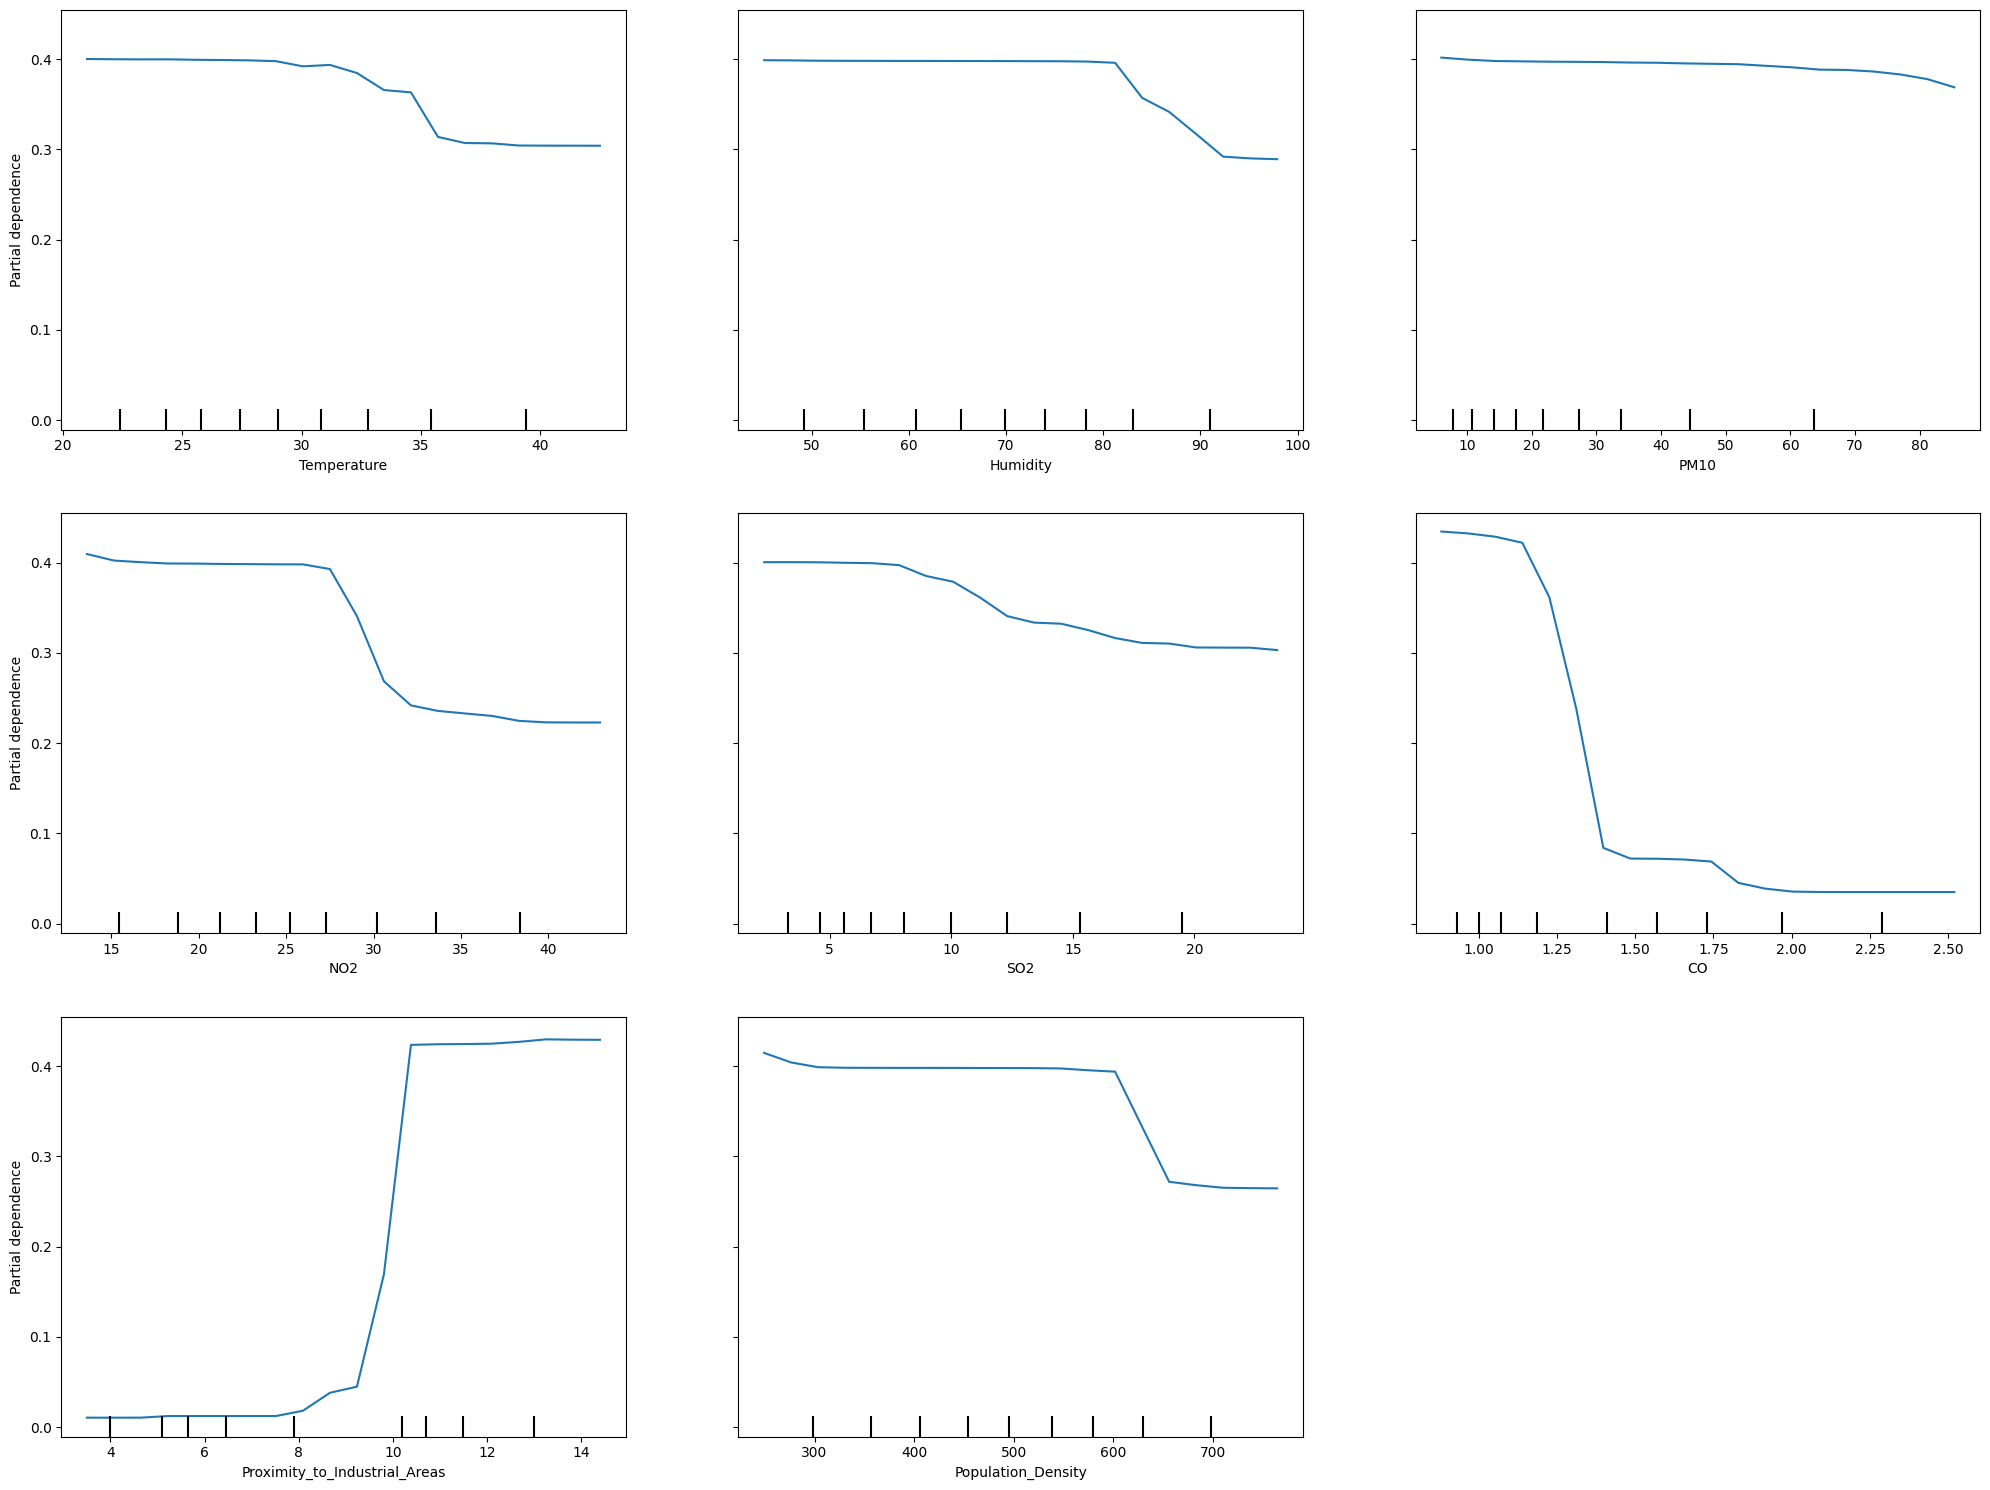

In [32]:
from sklearn.inspection import PartialDependenceDisplay
features = ['Temperature', 'Humidity', 'PM10', 'NO2', 'SO2', 'CO',
            'Proximity_to_Industrial_Areas', 'Population_Density']
target_class = 0

# Plot PDP for each feature
PartialDependenceDisplay.from_estimator(
    best_model, X_train, features=features,
    n_cols=3, target=target_class,
    grid_resolution=20  # Increase for smoother curves
)

fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

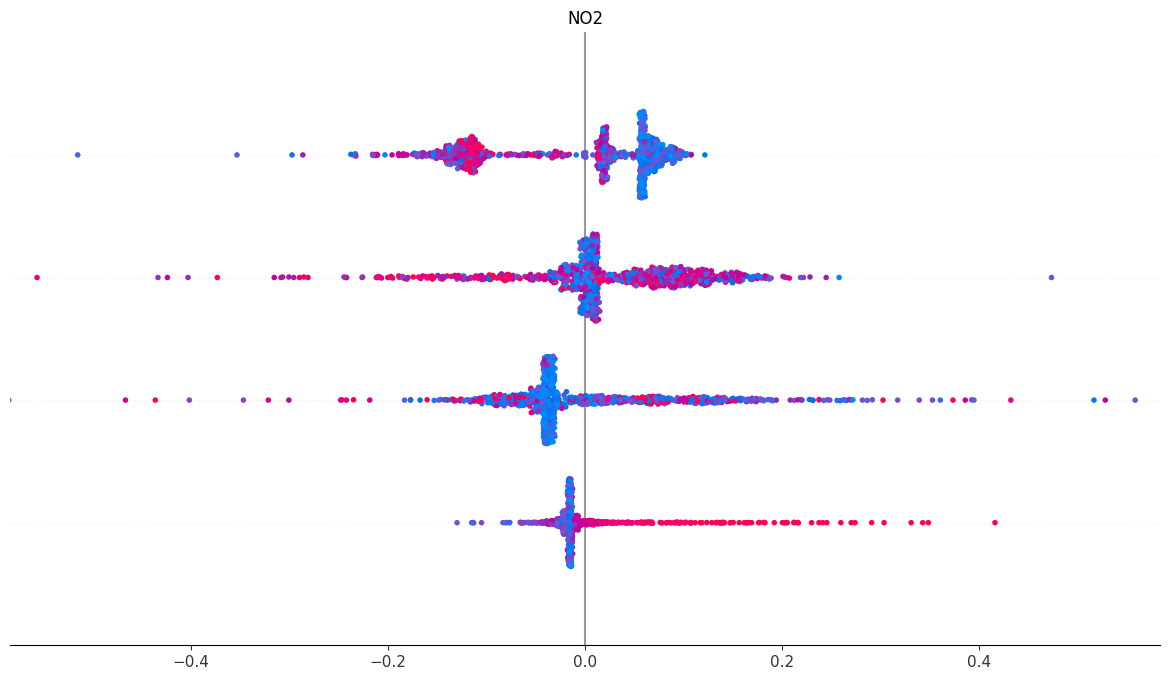

In [33]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Summary plot for all classes
shap.summary_plot(shap_values, X_test, class_names=best_model.classes_)